In [52]:
import matplotlib
matplotlib.font_manager.fontManager.addfont('/Users/hoyi/Desktop/rrr/TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, windows
from scipy.io import loadmat
from scipy.signal import stft

In [54]:
# 讀取 .mat 文件
filename = "/Users/hoyi/Desktop/rrr/20240530_bleEXGdata.mat"
mat_data = loadmat(filename)

# 假設數據存儲在名為 'data' 的變量中
data = mat_data['data']

# 確保數據是 numpy 數組
data = np.array(data).T


In [80]:
fs = 250

print("數據形狀:",data.shape)

# 提取和處理通道數據
CH1 = data[:, 0]
CH2 = data[:, 1]

print("CH1 長度:",CH1.size)
print("CH2 長度:",CH2.size)

#計算CH3
CH3 = CH1 - CH2

total_time = np.size(CH3) / fs
print(f'整段時間: {total_time:.2f} 秒')

數據形狀: (85482, 2)
CH1 長度: 85482
CH2 長度: 85482
整段時間: 341.93 秒


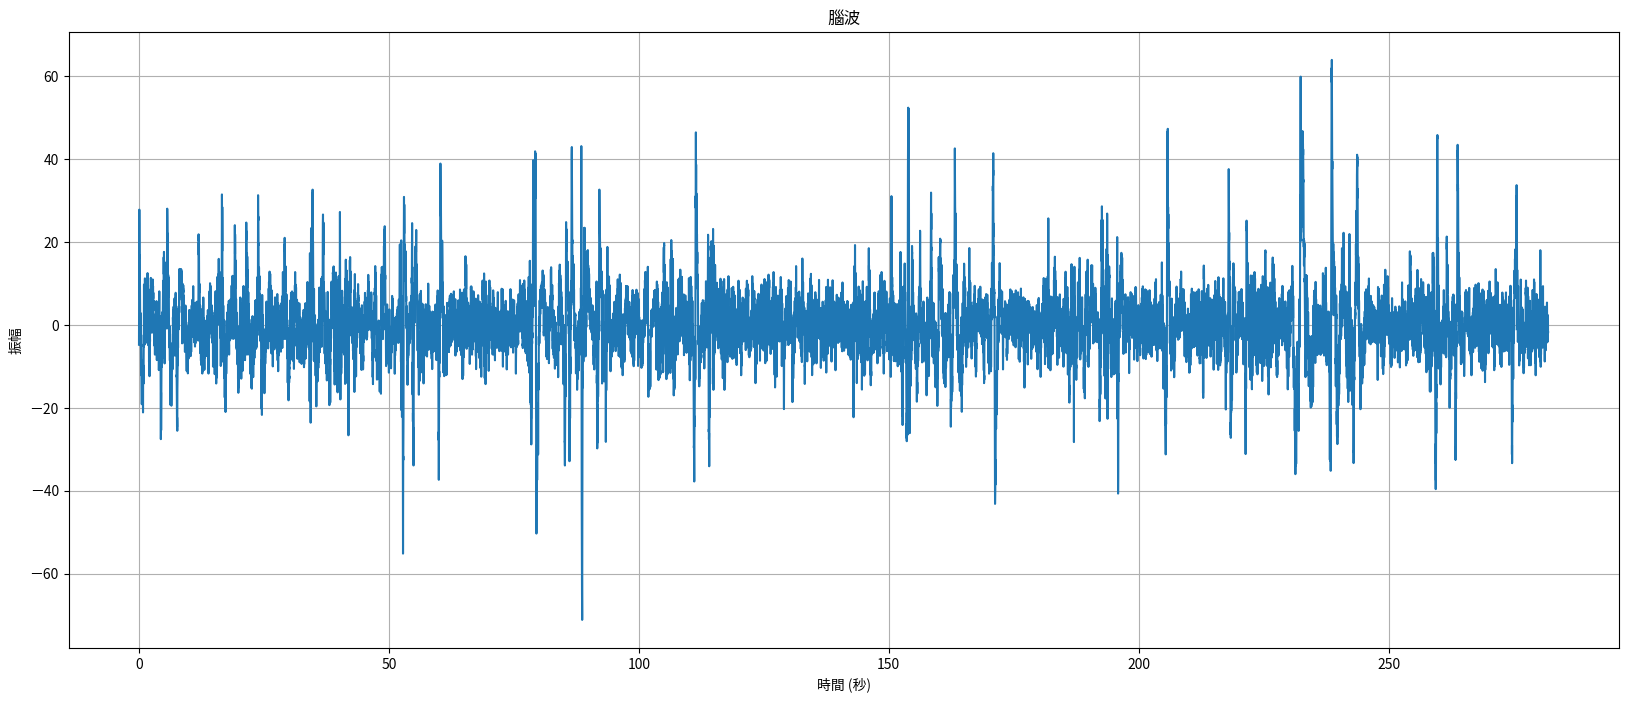

In [61]:
#CH3波形
t = np.arange(0, total_time, 1 / fs)
plt.figure(figsize=(20, 8))
plt.plot(t, CH3)
plt.title('腦波')
plt.xlabel('時間 (秒)')
plt.ylabel('振幅')
plt.grid(True)
plt.show()


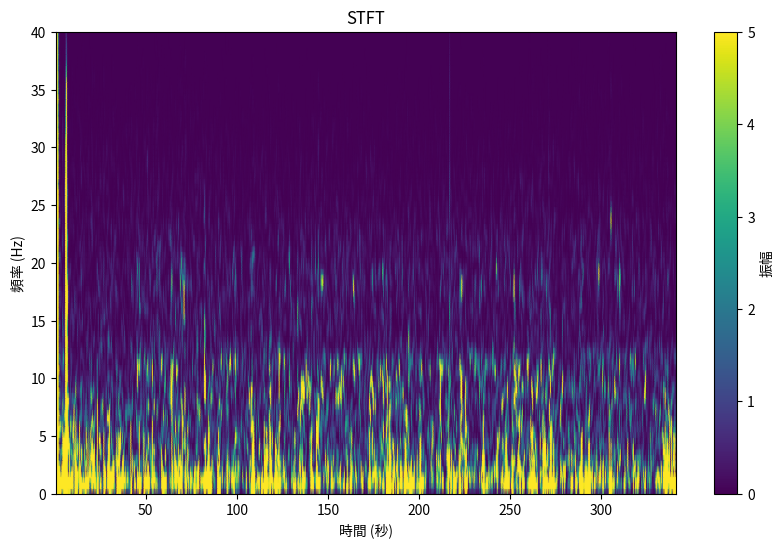

In [88]:

win = windows.hamming(256)  #使用Hamming窗口
noverlap = 128  #重疊部分
nfft = 512  #FFT點數

f, t_stft, Sxx = spectrogram(CH3, fs, window=win, noverlap=noverlap, nfft=nfft, scaling='spectrum')

#STFT
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_stft, f, np.abs(Sxx), shading='gouraud',vmax=5) #vmax最大振幅
plt.ylim(0, 40) #最大頻率
plt.title('STFT')
plt.xlabel('時間 (秒)')
plt.ylabel('頻率 (Hz)')
cbar = plt.colorbar()
cbar.set_label('振幅')
plt.show()